## TMA4215 - Exercise 5 ## 
*Group: Hanna Heshmati Rød, Karine Austbø Grande and Thea Boge*

#### Problem 1

\begin{align*}
    f(\bold{x}) = x_1^2 + (x_2 -8)^2 - (x_3 + 5)^2
\end{align*}


Calculating gradient of funciton

\begin{align*}
\nabla f(\bold{x}) = \nabla f(\left.x_{1}, x_{2}, x_{3}\right)=\left(\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(\left.x_{1}, x_{2}, x_{3}\right)\\\\
\dfrac{\partial f}{\partial x_2}(\left.x_{1}, x_{2}, x_{3}\right) \\\\
\dfrac{\partial f}{\partial x_3}(\left.x_{1}, x_{2}, x_{3}\right) 
\end{array}\right)
= \left(\begin{array}{c} 2x_1 \\
2(x_2 -8) \\
-2(x_3 +5)
\end{array}\right)
\end{align*}

Evaluating the gradient at the initial point $\bold{x}^{(0)} = (0,0,0)^T$

\begin{align*}
\bold{g}^{(0)} = f(\bold{x}^{(0)}) = \left(\begin{array}{c} 0 \\
2(0 -8) \\
-2(0 +5)
\end{array}\right)
= \left(\begin{array}{c} 0 \\
-16\\
-10
\end{array}\right)
\end{align*}


\begin{align*}
    \alpha_0 = \argmin_{\alpha \geq 0} f(\bold{x}^{(0)} - \alpha \bold{g}^{(0)})
    = \argmin_{\alpha \geq 0} 0 + (6\alpha - 8)^2 - (10\alpha + 5)^2
    =\argmin_{\alpha \geq 0} (16\alpha - 8)^2 -(10\alpha + 5)^2
    = \argmin_{\alpha \geq 0} 156\alpha^2 - 356\alpha + 39
\end{align*}

Minimizing with respect to $\alpha$

\begin{align*}
\dfrac{\partial f}{\partial \alpha} = 312 \alpha - 356 = 0
\end{align*}

\begin{align*}
\alpha_0 = \dfrac{356}{312} = 1.141
\end{align*}

The next iterate $\bold{x}^{(1)}$ is:

\begin{align*}
\bold{x}^{(1)} = \bold{x}^{(0)} - \alpha_0\bold{g}^{(0)}
= -1.141 \left(\begin{array}{c} 0 \\
-16\\
-10
\end{array}\right)
= \left(\begin{array}{c} 0 \\
18.256\\
11.41
\end{array}\right)
\end{align*}


\begin{align*}
\bold{g}^{(1)} = f(\bold{x}^{(1)}) = \left(\begin{array}{c} 0 \\
2(18.256 -8) \\
-2(11.41 +5)
\end{array}\right)
= \left(\begin{array}{c} 0 \\
20.512\\
-32.82
\end{array}\right)
\end{align*}

\begin{align*}
    \alpha_1 = \argmin_{\alpha \geq 0} f(\bold{x}^{(1)} - \alpha \bold{g}^{(1)})
    = \argmin_{\alpha \geq 0} 0 + (18.256  - 20.512 \alpha - 8)^2 - (11.41 + 32.82 \alpha + 5)^2
    = \argmin_{\alpha \geq 0} -656 \alpha^2 - 1495.68 \alpha - 164.1024
\end{align*}

Minimizing with respect to $\alpha$

\begin{align*}

\dfrac{\partial f}{\partial \alpha} = -1312 \alpha - 1495.68 = 0

\end{align*}
Solving for $\alpha$
\begin{align*}
\alpha_1 = \dfrac{1495.68}{-1312} = -1.14
\end{align*}

The next iterate $\bold{x}^{21)}$ is:

\begin{align*}
\bold{x}^{(2)} = \bold{x}^{(1)} - \alpha_1\bold{g}^{(1)}
=\left(\begin{array}{c} 0 \\
18.256\\
11.41
\end{array}\right)
+ 1.14 \left(\begin{array}{c} 0 \\
20.512\\
-32.82
\end{array}\right)
= \left(\begin{array}{c} 0 \\
41.6387\\
-26.0048
\end{array}\right)
\end{align*}

#### Problem 2
We will now compare the following methods for the Rosenbrock function $\mathbb{f} : \mathbb{R}^2 \to \mathbb{R}$ 
$$\mathbb{f}(\bold{x}) = \mathbb{f}(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1-x_1)^2 $$

* `steepest_descent(f, gradf, x0, a0, c, s, tol, maxiter)`

* `conjugategradient(f, gradf, x0, a0, c, s, tol, maxiter)`

* `newton(f, gradf, hessf, x0, a0, c, s, tol, maxiter)`


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rosenbrock(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1-x1)**2

def rosenbrock_gradient(x):
    x1, x2 = x
    dfdx1 = -400 * x1 + (x2 - x1**2) - 2 * (1 - x1)
    dfdx2 = 200 * (x2 - x1**2)
    return np.array([dfdx1, dfdx2])

def rosenbrock_hessian(x):
    x1, x2 = x
    d2fdx1 = 1200 * x1**2 - 400 * x2 + 2
    d2fdx2 = 200
    d2fdx1x2 = -400 * x1
    return np.array([[d2fdx1, d2fdx1x2], [d2fdx1x2, d2fdx2]])

In [4]:
def steepest_descent(f, gradf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=1000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    
    for _ in range(maxiter):
        grad = gradf(xk)
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm <= tol:
            break
        
        alpha = a0
        while f(xk - alpha * grad) > f(xk) - c * alpha * grad_norm**2:
            alpha *= s
        
        xk = xk - alpha * grad
        iterates.append(xk)
        num_iterations += 1
    
    return np.array(iterates), num_iterations

In [5]:
def conjugate_gradient(f, gradf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=10000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    grad = gradf(xk)
    pk = -grad
    
    for _ in range(maxiter):
        if np.linalg.norm(grad) <= tol:
            break

        alpha = a0
        while f(xk + alpha * pk) > f(xk) + c * alpha * np.dot(grad, pk):
            alpha *= s
            
        xk = xk + alpha * pk
        iterates.append(xk)
        
        grad_new = gradf(xk)
        beta = np.dot(grad_new, grad_new) / np.dot(grad, grad)
        pk = -grad_new + beta * pk
        grad = grad_new
        num_iterations += 1
    
    return np.array(iterates), num_iterations

In [6]:
def newton(f, gradf, hessf, x0, a0=1, c=0.5, s=1e-2, tol=1e-4, maxiter=10000):
    xk = x0
    iterates = [xk]
    num_iterations = 0
    
    for _ in range(maxiter):
        grad = gradf(xk)
        if np.linalg.norm(grad) <= tol:
            break
        
        hess = hessf(xk)
        pk = -np.linalg.solve(hess, grad)
        
        alpha = a0
        while f(xk + alpha * pk) > f(xk) + c * alpha * np.dot(grad, pk):
            alpha *= s
        xk = xk + alpha * pk
        iterates.append(xk)
        num_iterations += 1
    
    return np.array(iterates), num_iterations

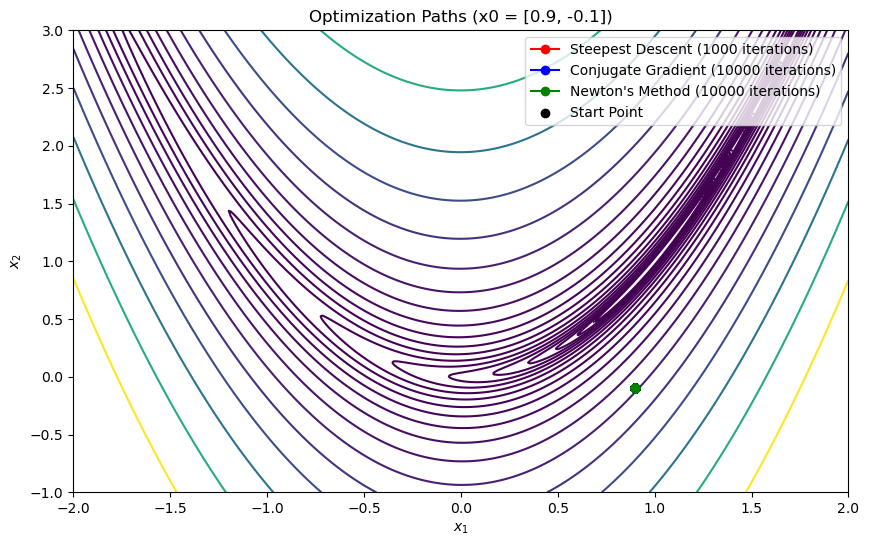

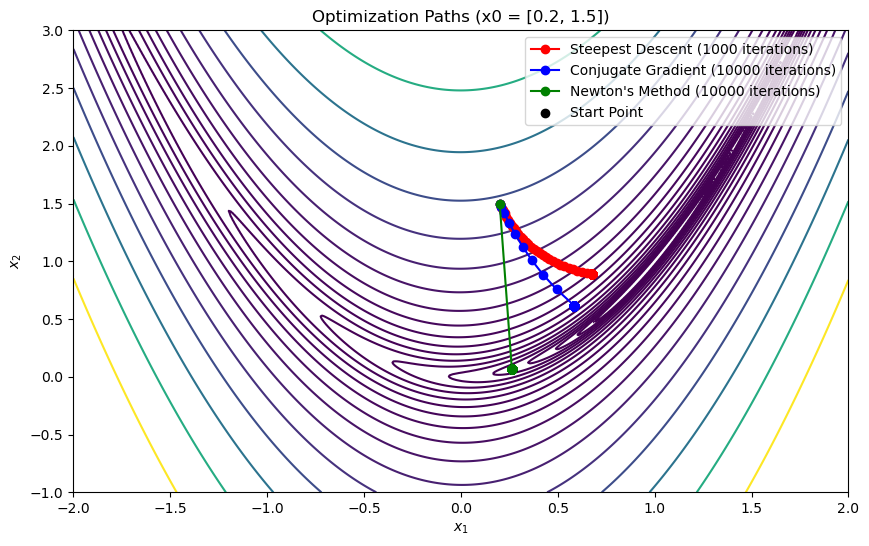

In [7]:
# Parameters
x0_1 = np.array([0.9, -0.1])
x0_2 = np.array([0.2, 1.5])

# Run optimization methods for first initial point
steepest_path_1, iter_steep_1 = steepest_descent(rosenbrock, rosenbrock_gradient, x0_1)
conjugate_path_1, iter_conj_1 = conjugate_gradient(rosenbrock, rosenbrock_gradient, x0_1)
newton_path_1, iter_newt_1 = newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0_1)

# Define the plotting function, with additional parameters for iteration counts
def plot_paths(paths, x0, title, iter_steep, iter_conj, iter_newt):
    x1_vals = np.linspace(-2, 2, 400)
    x2_vals = np.linspace(-1, 3, 400)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = rosenbrock([X1, X2])

    plt.figure(figsize=(10, 6))
    plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
    plt.plot(*zip(*paths[0]), marker="o", color="r", label=f"Steepest Descent ({iter_steep} iterations)")
    plt.plot(*zip(*paths[1]), marker="o", color="b", label=f"Conjugate Gradient ({iter_conj} iterations)")
    plt.plot(*zip(*paths[2]), marker="o", color="g", label=f"Newton's Method ({iter_newt} iterations)")
    plt.scatter(*x0, color="black", label="Start Point")
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()

# Plot for x0 = [0.9, -0.1]
plot_paths([steepest_path_1, conjugate_path_1, newton_path_1], x0_1, 
           "Optimization Paths (x0 = [0.9, -0.1])", iter_steep_1, iter_conj_1, iter_newt_1)

# Run optimization methods for the second initial point
steepest_path_2, iter_steep_2 = steepest_descent(rosenbrock, rosenbrock_gradient, x0_2)
conjugate_path_2, iter_conj_2 = conjugate_gradient(rosenbrock, rosenbrock_gradient, x0_2)
newton_path_2, iter_newt_2 = newton(rosenbrock, rosenbrock_gradient, rosenbrock_hessian, x0_2)

# Plot for x0 = [0.2, 1.5]
plot_paths([steepest_path_2, conjugate_path_2, newton_path_2], x0_2, 
           "Optimization Paths (x0 = [0.2, 1.5])", iter_steep_2, iter_conj_2, iter_newt_2)

#### Problem 3

In this task, we will use the Romberg scheme to approximate the integral:

$$
\int_0^3 \frac{1}{2 + 2x} \, dx.
$$

#### a)

We start by solving the integral by hand:

$$
\int_0^3 \frac{1}{2 + 2x} \, dx = \int_0^3 \frac{1}{2(1 + x)} \, dx = \frac{1}{2} \int_0^3 \frac{1}{1 + x} \, dx
$$

Evaluating the integral:

$$
\frac{1}{2} \int_0^3 \frac{1}{1 + x} \, dx = \frac{1}{2} \left[ \ln(1 + x) \right]_0^3 = \frac{1}{2} \left( \ln(4) - \ln(1) \right) = \frac{1}{2} \ln(4) = \frac{1}{2} \cdot 2 \ln(2) = \ln(2)
$$

So, the exact solution is:

$$
\int_0^3 \frac{1}{2 + 2x} \, dx = \ln(2).
$$

#### b)

The Romberg scheme uses trapezoidal approximations and then applies Richardson extrapolation to improve the accuracy. Let’s denote the Romberg approximations by $ A_{n,m} $, where $ n $ is the step number and $ m $ is the level of extrapolation.

Using a single trapezoid (width $ h = 3 $):

   $$
   A_{1,1} = \frac{h}{2} \left( f(0) + f(3) \right) = \frac{3}{2} \left( \frac{1}{2} + \frac{1}{8} \right) = \frac{3}{2} \cdot \frac{5}{8} = \frac{15}{16}
   $$

Subdivide into two intervals (width $ h = 1.5 $):

   $$
   A_{2,1} = \frac{h}{2} \left( f(0) + 2f(1.5) + f(3) \right)
   $$

   Plugging in values:

   $$
   = \frac{1.5}{2} \left( \frac{1}{2} + 2 \cdot \frac{1}{5} + \frac{1}{8} \right) = \frac{1.5}{2} \cdot \frac{41}{40} = \frac{123}{160}
   $$

Now, use the Romberg extrapolation to find $ A_{2,2} $:

   $$
   A_{2,2} = \frac{4 \cdot A_{2,1} - A_{1,1}}{3} = \frac{4 \cdot \frac{123}{160} - \frac{15}{16}}{3} = \frac{57}{80} = 0.7125
   $$

The exact solution is $ \ln(2) \approx 0.6931 $, so the error is given by:

$$
E = |0.7125 - 0.6931| = 0.0194
$$

Therefore, the error in the approximation $ A_{2,2} $ compared to the exact solution $ \ln(2) $ is:

$$
E \approx 0.0194.
$$

#### c)

To implement the Romberg scheme, we will use a function that applies Romberg integration up to 6 steps.

After calculating the Romberg integration, the final value $ R_{5,5} $ represents the approximation for the integral. We can calculate the error by comparing this value with the exact solution $ \ln(2) $:

$$
E = \left| R_{5,5} - \ln(2) \right|
$$

In [9]:
# Define the function to integrate
def f(x):
    return 1 / (2 + 2 * x)

# Romberg Integration function
def romberg_integration(f, a, b, steps):
    R = np.zeros((steps, steps))
    h = b - a
    # Initial trapezoidal estimate
    R[0, 0] = 0.5 * h * (f(a) + f(b))
    
    for i in range(1, steps):
        h /= 2
        sum_f = sum(f(a + k * h) for k in range(1, 2**i, 2))
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f
        
        # Extrapolation loop
        for j in range(1, i + 1):
            R[i, j] = (4**j * R[i, j - 1] - R[i - 1, j - 1]) / (4**j - 1)
    
    return R

# Apply Romberg integration
steps = 6
result = romberg_integration(f, 0, 3, steps)
print("Romberg Integration Table:")
print(result)

# Error comparison
exact_solution = np.log(2)
error = abs(result[-1, -1] - exact_solution)
print(f"Approximate Solution: {result[-1, -1]}")
print(f"Exact Solution: {exact_solution}")
print(f"Error: {error}")


Romberg Integration Table:
[[0.9375     0.         0.         0.         0.         0.        ]
 [0.76875    0.7125     0.         0.         0.         0.        ]
 [0.71404533 0.69581044 0.6946978  0.         0.         0.        ]
 [0.69856312 0.69340239 0.69324185 0.69321874 0.         0.        ]
 [0.69451543 0.69316619 0.69315045 0.69314899 0.69314872 0.        ]
 [0.69349018 0.69314844 0.69314725 0.6931472  0.6931472  0.69314719]]
Approximate Solution: 0.6931471941985407
Exact Solution: 0.6931471805599453
Error: 1.363859536418488e-08


#### Problem 4

We want to investigate two cases of exact quadrature properties. Note that a quadrature formula $ Q(f) $ is called **exact** for a space $ G $ of functions if

$$
Q(f) = I(f) \quad \text{for all} \quad f \in G.
$$

The quadrature formula we are given is

$$
Q(f) = w_0 f(0) + w_1 f\left(\frac{\pi}{2}\right) + w_2 f(\pi),
$$

where we need to determine the weights $ w_0, w_1, w_2 $ such that the formula $ Q $ is **exact** for all functions from the space

$$
G = \text{span} \left\{ 1, \sin(x), \cos\left(\frac{x}{2}\right) \right\}
$$

on the interval $ [0, \pi] $.

To determine the weights $ w_0, w_1, w_2 $, we need the quadrature formula $ Q(f) $ to match the exact integral values for each function in the span of $ G $. That is, we need:

1. For $ f(x) = 1 $:
   $$
   \int_0^\pi 1 \, dx = \pi.
   $$
   Applying $ Q(f) $:
   $$
   Q(1) = w_0 + w_1 + w_2.
   $$
   Therefore, we have the equation:
   $$
   w_0 + w_1 + w_2 = \pi.
   $$

2. For $ f(x) = \sin(x) $:
   $$
   \int_0^\pi \sin(x) \, dx = 2.
   $$
   Applying $ Q(f) $:
   $$
   Q(\sin(x)) = w_0 \sin(0) + w_1 \sin\left(\frac{\pi}{2}\right) + w_2 \sin(\pi).
   $$
   Since $ \sin(0) = 0 $ and $ \sin(\pi) = 0 $, this simplifies to:
   $$
   Q(\sin(x)) = w_1.
   $$
   Therefore, we have:
   $$
   w_1 = 2.
   $$

3. For $ f(x) = \cos\left(\frac{x}{2}\right) $:
   $$
   \int_0^\pi \cos\left(\frac{x}{2}\right) \, dx = 2.
   $$
   Applying $ Q(f) $:
   $$
   Q\left(\cos\left(\frac{x}{2}\right)\right) = w_0 \cos(0) + w_1 \cos\left(\frac{\pi}{4}\right) + w_2 \cos\left(\frac{\pi}{2}\right).
   $$
   Simplifying using $ \cos(0) = 1 $, $ \cos\left(\frac{\pi}{4}\right) = \frac{\sqrt{2}}{2} $, and $ \cos\left(\frac{\pi}{2}\right) = 0 $:
   $$
   Q\left(\cos\left(\frac{x}{2}\right)\right) = w_0 + \frac{\sqrt{2}}{2} w_1.
   $$
   Therefore, we have the equation:
   $$
   w_0 + \frac{\sqrt{2}}{2} \cdot 2 = 2.
   $$
   Simplifying this gives:
   $$
   w_0 + \sqrt{2} = 2,
   $$
   so
   $$
   w_0 = 2 - \sqrt{2}.
   $$

Finally, substituting $ w_1 = 2 $ and $ w_0 = 2 - \sqrt{2} $ into the first equation:

$$
(2 - \sqrt{2}) + 2 + w_2 = \pi,
$$
which simplifies to:
$$
w_2 = \pi - 4 + \sqrt{2}.
$$

Thus, the weights are:
$$
w_0 = 2 - \sqrt{2}, \quad w_1 = 2, \quad w_2 = \pi - 4 + \sqrt{2}.
$$
